# Tutorial for Car Co-ordinates and Directions

This is tutorial for detecting car position on track and getting the directions of the car.
All the data is then stored in the CSV file.

# Steps :-

1. Read the image
2. Detect Contours around the car
3. Draw Bounding Box (Rectangle) around the car
4. Crop the Image around bounding box
5. Detect positiof car on track (co-ordinates of car)
6. Seperate RGB Channels of detected car in ROI (We can determine the direction as color of car changes while when its moving in different directions)
7. Write co-ordinates and color chaneel values in the empty dictionary
8. Create CSV file of co-ordinates and color channels

## 1. Original Car Image with bouding box
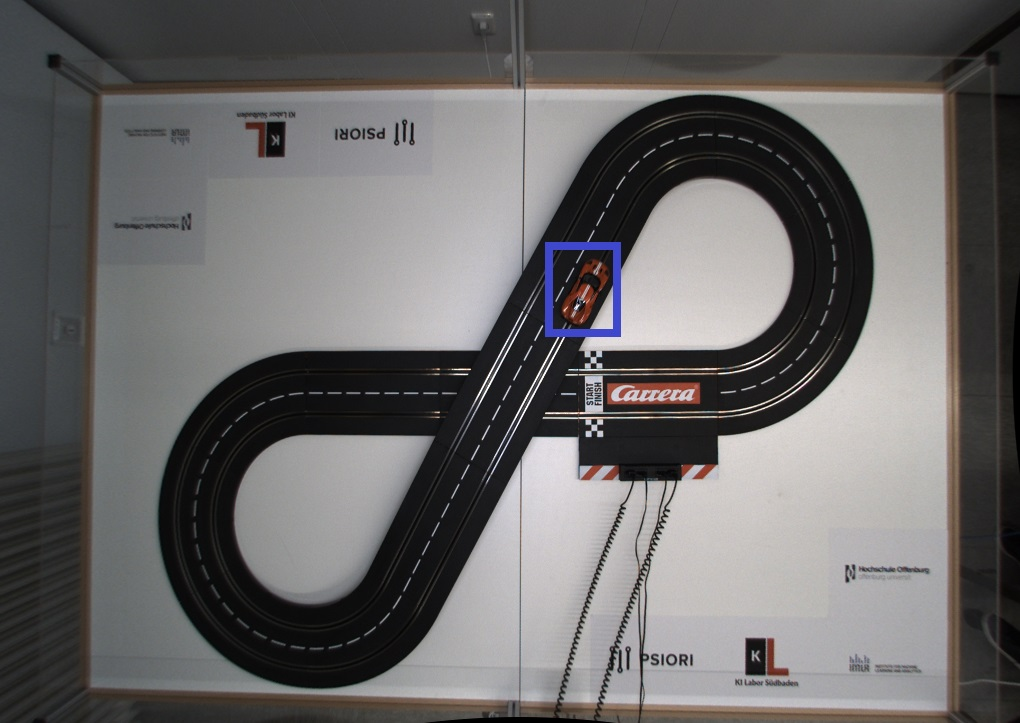

## 2. Optical Car image with bouding box
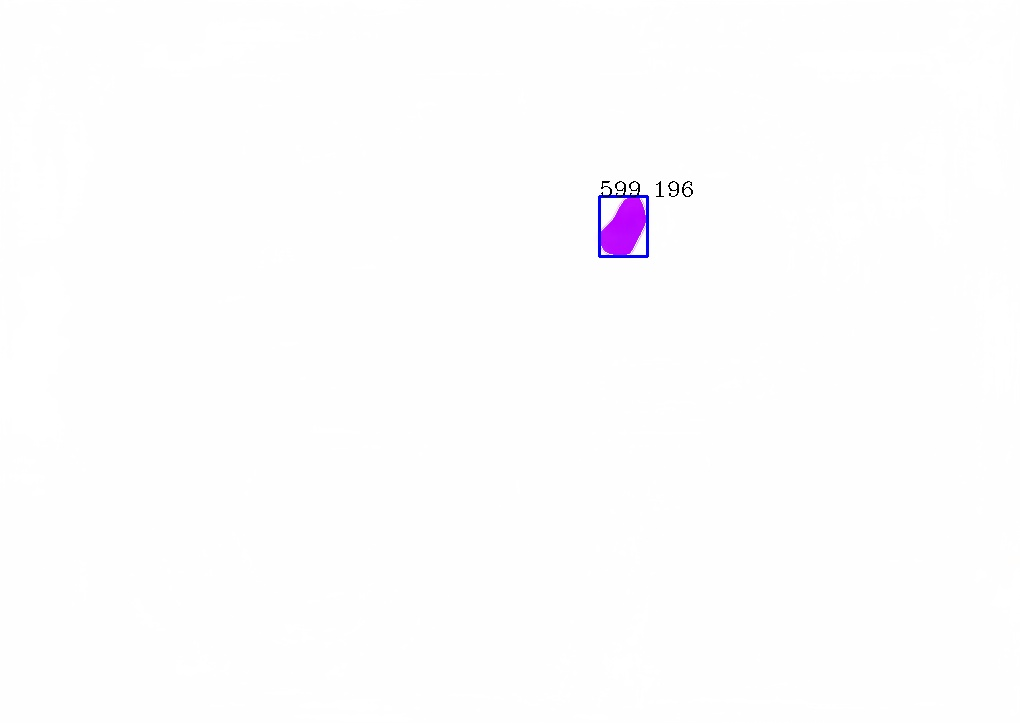

# Importing Libraries

In [ ]:
import cv2
import matplotlib.pyplot as plt
import glob
import os
import re
import csv
import pandas as pd

# 1. For Yellow Car

## Step 1 : Create empty dictionary

In [ ]:
# Create an empty dictionary to store car co-ordinates and color channels
dictionary_yellow = {}

## Step 2 : Detect Car co-ordinates and color channels

In [ ]:
# Read the images 
files = glob.glob('../bfs-camera-driver/subscriber/data/img/car_B_red_14000/cars_calibrated_red/*.png')

for fn in sorted(files, key=lambda x: float(re.findall("(\d+)", x)[0])):
    
    # Read the color image
    image = cv2.imread(fn)
    
    # Make a copy
    new_image = image.copy()
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Convert the grayscale image to binary
    ret, binary = cv2.threshold(gray, 100, 255,
                                cv2.THRESH_OTSU)
    
    # Invert the binary image i.e black background and white image
    inverted_binary = ~binary
    
    # Find the contours on the inverted binary image,
    contours, hierarchy = cv2.findContours(inverted_binary,
                                           cv2.RETR_TREE,
                                           cv2.CHAIN_APPROX_SIMPLE)
    
    # Detect the first contour 
    first_contour = cv2.drawContours(new_image, contours, 0, (255, 255, 255), 0)
    
    # Draw Bounding box around contour
    # x is the starting x coordinate of the bounding box
    # y is the starting y coordinate of the bounding box
    # w is the width of the bounding box
    # h is the height of the bounding box
    x1, y1, w1, h1 = cv2.boundingRect(contours[0])
    
    # Check if car is on the track or out of track (if > 900 then car is out of track)
    if x1 < 900:
        
        # Draw Bounding Box arounf first contour
        cv2.rectangle(first_contour, (x1, y1), (x1 + w1, y1 + h1), (255, 0, 0), 2)

        # Detect Contour Area
        area_1 = cv2.contourArea(contours[0])
        
        # Check for valid contour
        if area_1 < 2500:
            
            # Crop image around the bounding box
            crop_img_1 = new_image[y1:y1 + h1, x1:x1 + w1]
            
            # Convert image from BGR to Grayscale
            gray_image_1 = cv2.cvtColor(crop_img_1, cv2.COLOR_BGR2GRAY)
            
            # Set the threshold
            ret, thresh_1 = cv2.threshold(gray_image_1, 127, 255, 0)

            # calculate moments of
            '''
            Image Moment is a particular weighted average of image pixel intensities, 
            with the help of which we can find some specific properties of an image, 
            like radius, area, centroid etc
            '''
            M_1 = cv2.moments(thresh_1)
            
            # Find the center of the cropped image
            if M_1["m00"] != 0:
                cX_1 = int(M_1["m10"] / M_1["m00"])
                cY_1 = int(M_1["m01"] / M_1["m00"])
            else:
                cX_1, cY_1 = 0, 0
            
            # Condition to check error for out of bound area
            if (cX_1 < h1) and (cY_1 < w1):

                # BGR Channel for 1st ROI
                (b1, g1, r1) = crop_img_1[cX_1, cY_1]

                # Store car co-ordinates and color channels in dictionary
                dictionary_yellow[fn] = [x1, y1, w1, h1, b1, g1, r1]


## Step 3 : Creating CSV File

In [ ]:
# List of colomms for CSV file
columns = ['X','Y','W','H', 'Blue-Channel', 'Green-Channel', 'Red-Channel']

# Create a CSV File
with open('Car-Yellow.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(columns)
    
    # Write car co-ordimates and color channels in CSV file
    for fn in dictionary_yellow:
        wr.writerow(dictionary_yellow[fn])

## Step 4: Overview of csv file

In [ ]:
data_yellow = pd.read_csv('Car-Yellow.csv')
data_yellow.head(10)

,X,Y,W,H,Blue-Channel,Green-Channel,Red-Channel
0,753,379,57,45,219,255,131
1,626,401,59,30,255,0,0
2,556,405,23,18,176,255,176
3,416,402,35,30,255,226,12
4,343,402,53,33,255,219,8
5,262,403,53,36,149,255,32
6,216,414,53,53,18,255,152
7,195,463,42,60,20,244,255
8,195,516,34,59,223,246,255
9,202,549,44,58,24,144,255


# 2. Red Car

## Step 1 : Create empty dictionary

In [ ]:
# Create an empty dictionary to store car co-ordinates and color channels
dictionary_red = {}

## Step 2 : Detect Car co-ordinates and color channels

In [ ]:
# Read the images 
files = glob.glob('../bfs-camera-driver/subscriber/data/img/car_B_red_14000/cars_calibrated_red/*.png')

for fn in sorted(files, key=lambda x: float(re.findall("(\d+)", x)[0])):
    
    # Read the color image
    image = cv2.imread(fn)
    
    # Make a copy
    new_image = image.copy()
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Convert the grayscale image to binary
    ret, binary = cv2.threshold(gray, 100, 255,
                                cv2.THRESH_OTSU)
    
    # Invert the binary image i.e black background and white image
    inverted_binary = ~binary
    
    # Find the contours on the inverted binary image,
    contours, hierarchy = cv2.findContours(inverted_binary,
                                           cv2.RETR_TREE,
                                           cv2.CHAIN_APPROX_SIMPLE)
    
    # Detect the first contour 
    first_contour = cv2.drawContours(new_image, contours, 0, (255, 255, 255), 0)
    
    # Draw Bounding box around contour
    # x is the starting x coordinate of the bounding box
    # y is the starting y coordinate of the bounding box
    # w is the width of the bounding box
    # h is the height of the bounding box
    x1, y1, w1, h1 = cv2.boundingRect(contours[0])
    
    # Check if car is on the track or out of track (if > 900 then car is out of track)
    if x1 < 900:
        
        # Draw Bounding Box around first contour
        cv2.rectangle(first_contour, (x1, y1), (x1 + w1, y1 + h1), (255, 0, 0), 2)

        # Detect Contour Area
        area_1 = cv2.contourArea(contours[0])
        
        # Check for valid contour
        if area_1 < 2500:
            
            # Crop image around the bounding box
            crop_img_1 = new_image[y1:y1 + h1, x1:x1 + w1]
            
            # Convert image from BGR to Grayscale
            gray_image_1 = cv2.cvtColor(crop_img_1, cv2.COLOR_BGR2GRAY)
            
            # Set the threshold
            ret, thresh_1 = cv2.threshold(gray_image_1, 127, 255, 0)

            # calculate moments of cropped image
            '''
            Image Moment is a particular weighted average of image pixel intensities, 
            with the help of which we can find some specific properties of an image, 
            like radius, area, centroid etc
            '''
            M_1 = cv2.moments(thresh_1)
            
            # Find the center of the cropped image
            if M_1["m00"] != 0:
                cX_1 = int(M_1["m10"] / M_1["m00"])
                cY_1 = int(M_1["m01"] / M_1["m00"])
            else:
                cX_1, cY_1 = 0, 0
            
            # Condition to check error for out of bound area
            if (cX_1 < h1) and (cY_1 < w1):

                # BGR Channel for 1st ROI
                (b1, g1, r1) = crop_img_1[cX_1, cY_1]

                # Store car co-ordinates and color channels in dictionary
                dictionary_red[fn] = [x1, y1, w1, h1, b1, g1, r1]


## Step 3 : Creating CSV File

In [ ]:
# List of colomms for CSV file
columns = ['X','Y','W','H', 'Blue-Channel', 'Green-Channel', 'Red-Channel']

# Create a CSV File
with open('Car-Red.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(columns)
    
    # Write car co-ordimates and color channels in CSV file
    for fn in dictionary_red:
        wr.writerow(dictionary_red[fn])

## Step 4: Overview of csv file

In [ ]:
data_red = pd.read_csv('Car-Red.csv')
data_red.head(10)

,X,Y,W,H,Blue-Channel,Green-Channel,Red-Channel
0,731,336,61,39,255,242,13
1,595,384,4,1,255,0,0
2,438,366,26,14,255,0,0
3,432,353,43,35,255,216,10
4,359,353,59,39,255,210,9
5,305,353,58,37,255,230,14
6,231,358,58,45,97,255,9
7,194,379,56,51,14,255,80
8,163,426,50,64,9,255,212
9,159,493,33,64,255,0,0


# 3. Both Cars

## Step 1: Create empty dictionary

In [ ]:
# Create an empty dictionary to store car co-ordinates and color channels
dictionary_both = {}

## Step 2 : Car Co-ordinates and Color Channels

In [ ]:
# Read the images 
files = glob.glob('../bfs-camera-driver/subscriber/data/img/two_cars_A-14000_b-13000/cars_calibrated_both/*.png')

for fn in sorted(files, key=lambda x: float(re.findall("(\d+)", x)[0])):
    
    # Read the color image
    image = cv2.imread(fn)

    # Make a copy
    new_image = image.copy()

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Convert the grayscale image to binary
    ret, binary = cv2.threshold(gray, 100, 255,
                                cv2.THRESH_OTSU)
    
    # Invert the binary image i.e black background and white image
    inverted_binary = ~binary

    # Find the contours on the inverted binary image
    contours, hierarchy = cv2.findContours(inverted_binary,
                                           cv2.RETR_TREE,
                                           cv2.CHAIN_APPROX_SIMPLE)
    
    # Detect the first contour
    first_contour = cv2.drawContours(new_image, contours, 0, (255, 0, 255), 3)

    # Draw Bounding box around first contour
    # x is the starting x coordinate of the bounding box
    # y is the starting y coordinate of the bounding box
    # w is the width of the bounding box
    # h is the height of the bounding box
    x1, y1, w1, h1 = cv2.boundingRect(contours[0])
    cv2.rectangle(first_contour, (x1, y1), (x1 + w1, y1 + h1), (255, 0, 0), 2)

    # Check if second contour present 
    if len(contours) > 1:

        # Detect second contour
        second_contour = cv2.drawContours(new_image, contours, 1, (255, 0, 255), 3)
        
        # Draw Bounding box around second contour
        x2, y2, w2, h2 = cv2.boundingRect(contours[1])
        cv2.rectangle(second_contour, (x2, y2), (x2 + w2, y2 + h2), (255, 0, 0), 2)
        
        # Check if second car is on the track or out of track (if > 900 then car is out of track)
        if x2 < 900:
        
            # Detect Contour Area
            area_2 = cv2.contourArea(contours[1])

            # Check for valid contour
            if area_2 < 2500:

                # Cropping 2nd Image
                crop_img_2 = new_image[y2:y2 + h2, x2:x2 + w2]
                
                # Converting from BGR to RGB
                crop_img_plot_2 = cv2.cvtColor(crop_img_2, cv2.COLOR_BGR2RGB)

                ########### Centroid for 2nd ROI #############################
                
                # Convert image from BGR to Grayscale
                gray_image_2 = cv2.cvtColor(crop_img_2, cv2.COLOR_BGR2GRAY)
                
                # Set the threshold
                ret, thresh_2 = cv2.threshold(gray_image_2, 127, 255, 0)
                
                # calculate moments of cropped image
                '''
                Image Moment is a particular weighted average of image pixel intensities, 
                with the help of which we can find some specific properties of an image, 
                like radius, area, centroid etc
                '''
                M_2 = cv2.moments(thresh_2)

                # Find the center of the cropped image
                if M_2["m00"] != 0:
                    cX_2 = int(M_2["m10"] / M_2["m00"])
                    cY_2 = int(M_2["m01"] / M_2["m00"])
                else:
                    cX_2, cY_2 = 0, 0
                    
                # Condition to check error for out of bound area
                if (cX_2 < h2) and (cY_2 < w2):
            
                    # RGB Chanel for 2nd ROI
                    (r2, g2, b2) = crop_img_plot_2[cX_2, cX_2]
            
        # Check if first car is on the track or out of track (if > 900 then car is out of track)
        if x1 < 900:

            # Detect Contour Area
            area_1 = cv2.contourArea(contours[0])
            
            # Check for valid contour
            if area_1 < 2500:

                # Cropping 1st Image
                crop_img_1 = new_image[y1:y1 + h1, x1:x1 + w1]

                # Plot for 1st ROI
                crop_img_plot_1 = cv2.cvtColor(crop_img_1, cv2.COLOR_BGR2RGB)

                ########### Centroid for 1st ROI #############################

                # Convert image from BGR to Grayscale
                gray_image_1 = cv2.cvtColor(crop_img_1, cv2.COLOR_BGR2GRAY)
                
                # Set the threshold
                ret, thresh_1 = cv2.threshold(gray_image_1, 127, 255, 0)
                
                # calculate moments of
                M_1 = cv2.moments(thresh_1)

                # Find the center of the cropped image
                if M_1["m00"] != 0:
                    cX_1 = int(M_1["m10"] / M_1["m00"])
                    cY_1 = int(M_1["m01"] / M_1["m00"])
                else:
                    cX_1, cY_1 = 0, 0

                # Condition to check error for out of bound area
                if (cX_1 < h1) and (cY_1 < w1):
                    
                    # RGB Channel for 1st ROI
                    (r1, g1, b1) = crop_img_plot_1[cX_1, cY_1]
                   
                    # Store car co-ordinates and color channels in dictionary
                    dictionary_both[fn] = [x1, y1, w1, h1, x2, y2, w2, h2, b1, g1, r1, b2, g2, r2]

## Step 3 : Creating CSV Files

In [ ]:
# List of colomns for CSV file
columns = ['Xcar1', 'Ycar1', 'Wcar1', 'Hcar1', 'Xcar2', 'Ycar2', 'Wcar2', 'Hcar2', 
           'Bcar1', 'Gcar1', 'Rcar1', 'Bcar2', 'Gcar2', 'Rcar2']

# Create a CSV File
with open('Car-Both.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(columns)
    
    # Write car co-ordinates and color channels in CSV file
    for fn in dictionary_both:
        wr.writerow(dictionary_both[fn])

## Step 4: Overview of csv file

In [ ]:
data_both = pd.read_csv('Car-Both.csv')
data_both.head(10)

,Xcar1,Ycar1,Wcar1,Hcar1,Xcar2,Ycar2,Wcar2,Hcar2,Bcar1,Gcar1,Rcar1,Bcar2,Gcar2,Rcar2
0,181,583,20,28,447,381,53,69,4,163,255,255,16,173
1,192,604,52,56,490,298,54,63,64,139,255,255,9,173
2,220,630,56,46,516,256,53,63,76,120,255,255,8,174
3,244,640,59,41,534,223,51,63,93,113,255,255,12,178
4,282,649,57,38,560,178,53,62,133,91,255,255,10,183
5,307,645,58,42,578,143,54,60,194,96,255,255,10,213
6,336,631,60,54,611,111,51,53,255,101,252,231,6,255
7,365,613,57,59,652,96,57,43,255,108,229,98,27,255
8,385,591,53,63,696,96,61,34,255,94,208,14,40,255
9,395,569,56,69,735,99,58,39,255,69,195,255,0,255
